# Linear Dynamical System

In [329]:
using Plots
using Distributions

The model

$$
\begin{aligned}
    {\bf z}_{n+1} &= {\bf A}{\bf z}_{n} + \boldsymbol\varepsilon_{n+1}\\
    {\bf x}_{n+1} &= {\bf C}{\bf z}_{n+1} + \boldsymbol\varphi_{n+1}
\end{aligned}
$$

In [442]:
A = [
    [-0.9 1.4];
    [-0.1 1.1]
]

C = [
    [1   0.6];
    [-0.4 1]
]

2×2 Array{Float64,2}:
  1.0  0.6
 -0.4  1.0

In [443]:
m = zeros(2)
Γ = [
    [0.01 0]
    [0  0.01]
] / 10

epsn = MvNormal(m, Γ)

FullNormal(
dim: 2
μ: [0.0, 0.0]
Σ: [0.001 0.0; 0.0 0.001]
)


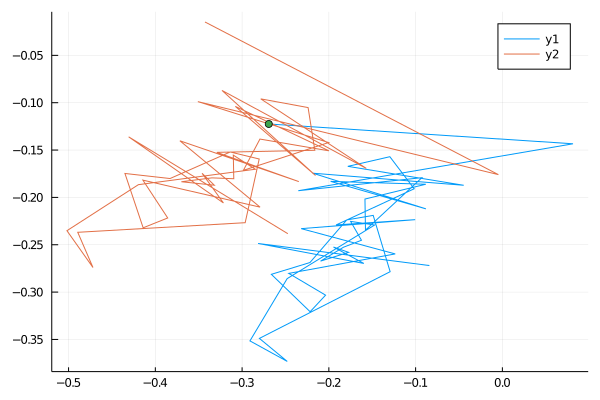

In [444]:
zn = [0.1; -0.1]
nsteps = 40
hist_array = zeros((2, nsteps, 2));

a, c = -1, -0.1

for n=1:nsteps
    zn = A * zn + rand(epsn)
    xn = C * zn
    
    hist_array[1, n, :] = zn
    hist_array[2, n, :] = xn
end

latent_x = hist_array[1, :, 1]
latent_y = hist_array[1, :, 2]

obs_x = hist_array[2, :, 1]
obs_y = hist_array[2, :, 2]

latent_x0, latent_y0 = hist_array[1, 1, :]

plot(latent_x, latent_y)
plot!(obs_x, obs_y)
scatter!([latent_x0], [latent_y0], label=nothing)

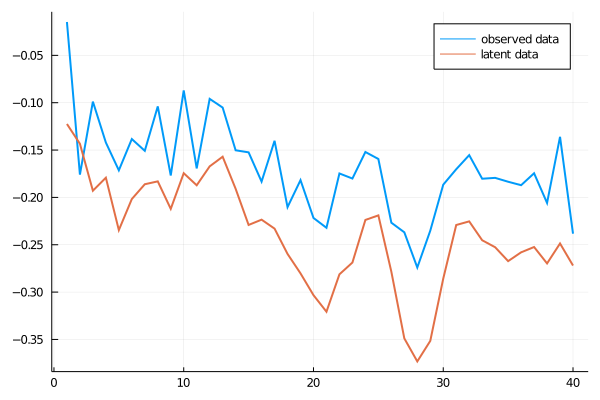

In [445]:
plot(obs_y, label="observed data", linewidth=2)
plot!(latent_y, label="latent data", linewidth=2)

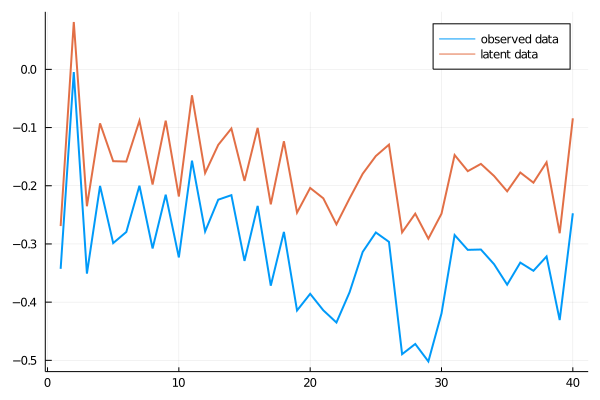

In [446]:
plot(obs_x, label="observed data", linewidth=2)
plot!(latent_x, label="latent data", linewidth=2)